# Climatology for OBC for "surface" tracers #

In [468]:
import cmocean.cm as cm
import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

In [199]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
meshx = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1 - meshx.tmask[0]

In [352]:
may = xr.open_dataset('/data/sallen/results/MEOPAR/averages/SalishSea_sep_climate_2007_2019_ptrc_T.nc')
may.time_counter

<xarray.DataArray 'time_counter' (time_counter: 1)>
array(['2013-09-15T20:18:27.692307456'], dtype='datetime64[ns]')
Coordinates:
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2013-09-15T20:18:27.692307456
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1900-01-01 00:00:00
    bounds:         time_counter_bounds
    cell_methods:   time_counter: mean

In [243]:
def do_plots(may):
    imin = 150
    fig, axs = plt.subplots(1, 3, figsize=(18, 8))
    may.diatoms[0, :, imin:500, :220].sum(axis=0).plot(ax=axs[0])
    may.flagellates[0, :, imin:500, :220].sum(axis=0).plot(ax=axs[1])
    may.microzooplankton[0, :, imin:500, :220].sum(axis=0).plot(ax=axs[2])
    for ax in axs:
        viz_tools.set_aspect(ax);
        ax.plot([50, 100, 100, 50, 50], [100, 100, 260, 260, 100], 'w')
        ax.plot([125, 175, 175, 125, 125], [75, 75, 175, 175, 75], 'orange')

    diatoms = np.ma.masked_array(np.array(may.diatoms[0, :, 150:500, :]) * np.array(meshx.e3t_0[0, :, 150:500, :]), mask = tmask[:, 150:500, :])
    flags = np.ma.masked_array(np.array(may.flagellates[0, :, 150:500, :]) * np.array(meshx.e3t_0[0, :, 150:500, :]), mask = tmask[:, 150:500, :])
    uzoo = np.ma.masked_array(np.array(may.microzooplankton[0, :, 150:500, :]) * np.array(meshx.e3t_0[0, :, 150:500, :]), mask = tmask[:, 150:500, :])
    volume = np.ma.masked_array(np.array(meshx.e3t_0[0, :, 150:500, :]), mask = tmask[:, 150:500, :])

    di = 3
    fig, ax = plt.subplots(1, 3, figsize=(18, 3))
    ax[0].plot(xx, diatoms[di,:,:180].sum(axis=0)/volume[di,:,:180].sum(axis=0), label='Diatoms')
    median = (diatoms[di,:,50:100].sum(axis=0)/volume[di,:,50:100].sum(axis=0)).mean()
    ax[0].plot([50, 100], [median, median], 'k', linewidth=5)
    median = (diatoms[di,:,125:175].sum(axis=0)/volume[di,:,125:175].sum(axis=0)).mean()
    ax[0].plot([125, 175], [median, median], 'orange', linewidth=5)
    ax[1].plot(xx, flags[di,:,:180].sum(axis=0)/volume[di,:,:180].sum(axis=0), label='Flagellates')
    median = (flags[di,:,50:100].sum(axis=0)/volume[di,:,50:100].sum(axis=0)).mean()
    ax[1].plot([50, 100], [median, median], 'k', linewidth=5)
    median = (flags[di,:,125:175].sum(axis=0)/volume[di,:,125:175].sum(axis=0)).mean()
    ax[1].plot([125, 175], [median, median], 'orange', linewidth=5)
    ax[2].plot(xx, uzoo[di,:,:180].sum(axis=0)/volume[di,:,:180].sum(axis=0), label='Microzooplankton')
    median = (uzoo[di,:,50:100].sum(axis=0)/volume[di,:,50:100].sum(axis=0)).mean()
    ax[2].plot([50, 100], [median, median], 'k', linewidth=5)
    median = (uzoo[di,:,125:175].sum(axis=0)/volume[di,:,125:175].sum(axis=0)).mean()
    ax[2].plot([125, 175], [median, median], 'orange', linewidth=5)
    for axi in ax:
        axi.legend();

In [248]:
def do_other_plots(may):
    imin = 150
    fig, axs = plt.subplots(1, 4, figsize=(20, 6.5))
    may.ammonium[0, :, imin:500, :220].sum(axis=0).plot(ax=axs[0])
    may.dissolved_organic_nitrogen[0, :, imin:500, :220].sum(axis=0).plot(ax=axs[1])
    may.particulate_organic_nitrogen[0, :, imin:500, :220].sum(axis=0).plot(ax=axs[2])
    may.biogenic_silicon[0, :, imin:500, :220].sum(axis=0).plot(ax=axs[3])
    for ax in axs:
        viz_tools.set_aspect(ax);
        ax.plot([50, 100, 100, 50, 50], [100, 100, 260, 260, 100], 'w')
        ax.plot([125, 175, 175, 125, 125], [75, 75, 175, 175, 75], 'orange')

    NH4 = np.ma.masked_array(np.array(may.ammonium[0, :, 150:500, :]) * np.array(meshx.e3t_0[0, :, 150:500, :]), 
                             mask = tmask[:, 150:500, :])
    DON = np.ma.masked_array(np.array(may.dissolved_organic_nitrogen[0, :, 150:500, :]) 
                             * np.array(meshx.e3t_0[0, :, 150:500, :]), mask = tmask[:, 150:500, :])
    PON = np.ma.masked_array(np.array(may.particulate_organic_nitrogen[0, :, 150:500, :]) 
                             * np.array(meshx.e3t_0[0, :, 150:500, :]), mask = tmask[:, 150:500, :])
    bSi = np.ma.masked_array(np.array(may.biogenic_silicon[0, :, 150:500, :]) 
                             * np.array(meshx.e3t_0[0, :, 150:500, :]), mask = tmask[:, 150:500, :])
    volume = np.ma.masked_array(np.array(meshx.e3t_0[0, :, 150:500, :]), mask = tmask[:, 150:500, :])

    di = 20
    fig, ax = plt.subplots(1, 4, figsize=(20, 3))
    ax[0].plot(xx, NH4[:di,:,:180].sum(axis=0).sum(axis=0)/volume[:di,:,:180].sum(axis=0).sum(axis=0), label='Ammonium')
    median = (NH4[:di,:,50:100].sum(axis=0).sum(axis=0)/volume[:di,:,50:100].sum(axis=0).sum(axis=0)).mean()
    ax[0].plot([50, 100], [median, median], 'k', linewidth=5)
    median = (NH4[:di,:,125:175].sum(axis=0).sum(axis=0)/volume[:di,:,125:175].sum(axis=0).sum(axis=0)).mean()
    ax[0].plot([125, 175], [median, median], 'orange', linewidth=5)
    ax[1].plot(xx, DON[:di,:,:180].sum(axis=0).sum(axis=0)/volume[:di,:,:180].sum(axis=0).sum(axis=0), label='Dissolved Organic Nitrogen')
    median = (DON[:di,:,50:100].sum(axis=0).sum(axis=0)/volume[:di,:,50:100].sum(axis=0).sum(axis=0)).mean()
    ax[1].plot([50, 100], [median, median], 'k', linewidth=5)
    median = (DON[:di,:,125:175].sum(axis=0).sum(axis=0)/volume[:di,:,125:175].sum(axis=0).sum(axis=0)).mean()
    ax[1].plot([125, 175], [median, median], 'orange', linewidth=5)
    ax[2].plot(xx, PON[:di,:,:180].sum(axis=0).sum(axis=0)/volume[:di,:,:180].sum(axis=0).sum(axis=0), label='Particulate Organic Nitrogen')
    median = (PON[:di,:,50:100].sum(axis=0).sum(axis=0)/volume[:di,:,50:100].sum(axis=0).sum(axis=0)).mean()
    ax[2].plot([50, 100], [median, median], 'k', linewidth=5)
    median = (PON[:di,:,125:175].sum(axis=0).sum(axis=0)/volume[:di,:,125:175].sum(axis=0).sum(axis=0)).mean()
    ax[2].plot([125, 175], [median, median], 'orange', linewidth=5)
    ax[3].plot(xx, bSi[:di,:,:180].sum(axis=0).sum(axis=0)/volume[:di,:,:180].sum(axis=0).sum(axis=0), label='Biogenic Silicon')
    median = (bSi[:di,:,50:100].sum(axis=0).sum(axis=0)/volume[:di,:,50:100].sum(axis=0).sum(axis=0)).mean()
    ax[3].plot([50, 100], [median, median], 'k', linewidth=5)
    median = (bSi[:di,:,125:175].sum(axis=0).sum(axis=0)/volume[:di,:,125:175].sum(axis=0).sum(axis=0)).mean()
    ax[3].plot([125, 175], [median, median], 'orange', linewidth=5)
    for axi in ax:
        axi.legend();

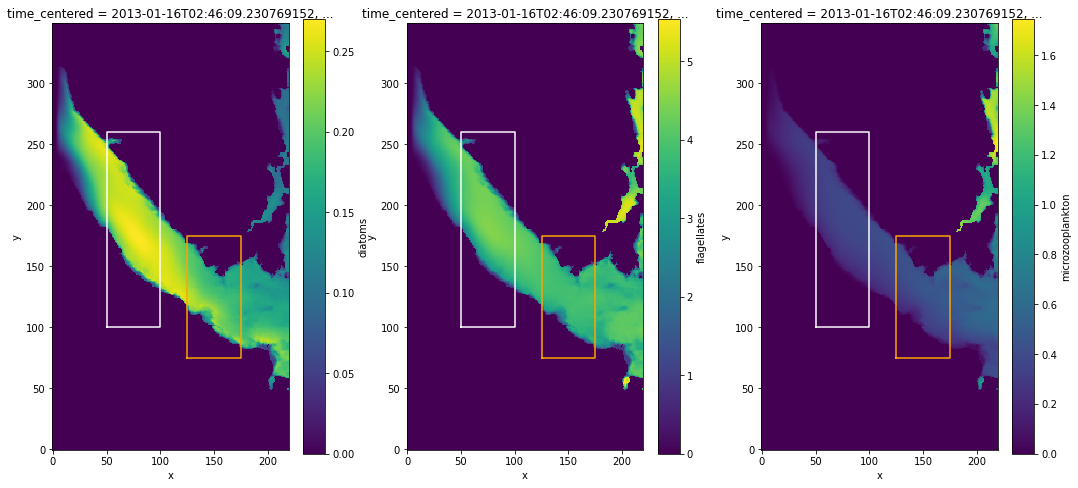

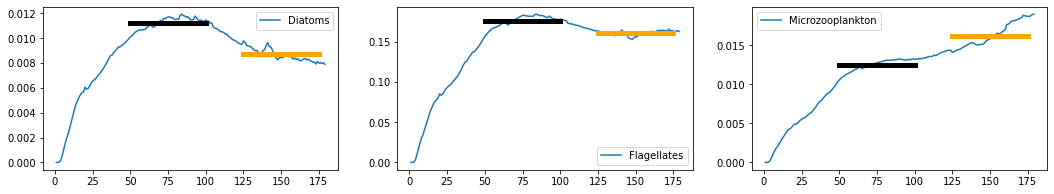

In [249]:
month = 'jan'
data = xr.open_dataset(f'/data/sallen/results/MEOPAR/averages/SalishSea_{month}_climate_2007_2019_ptrc_T.nc')
do_plots(data)

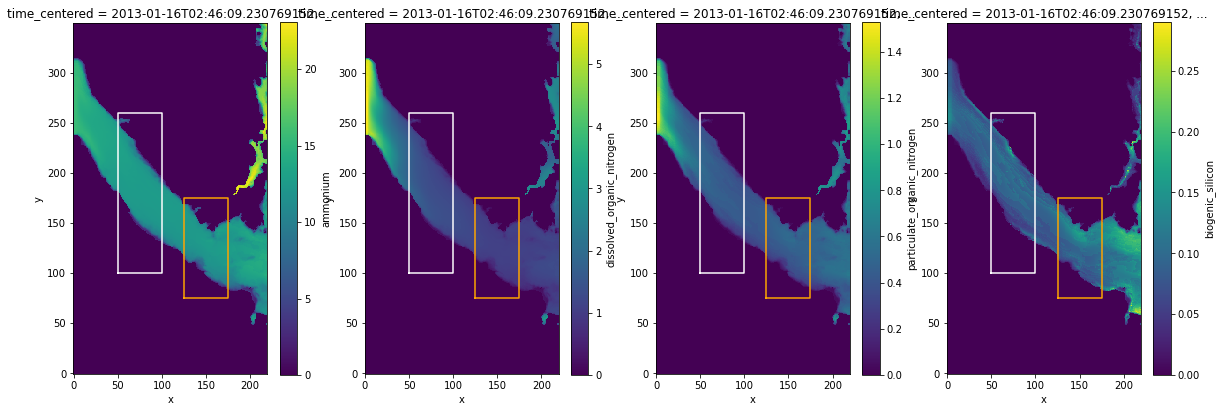

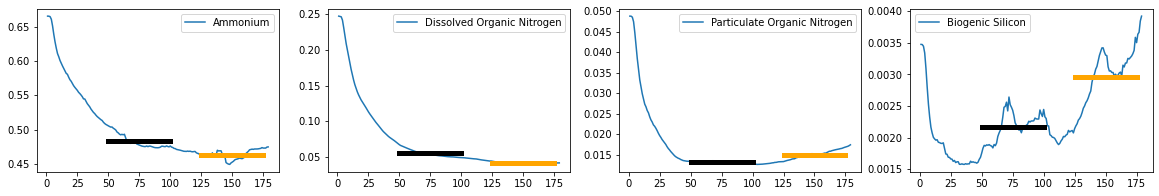

In [250]:
do_other_plots(data)
data.close()

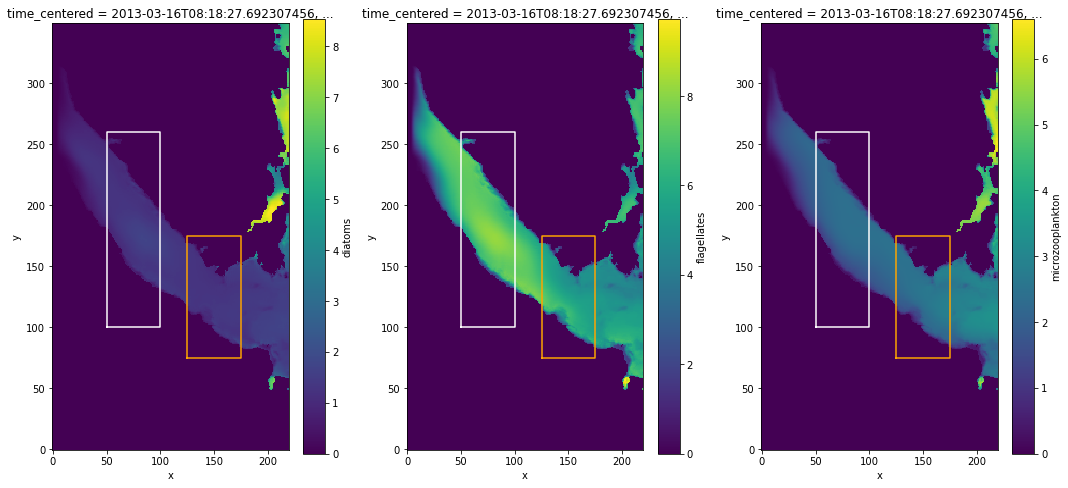

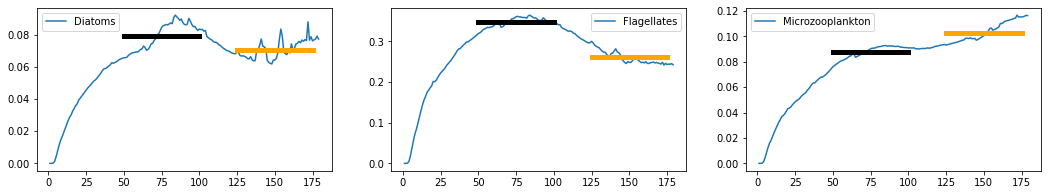

In [251]:
month = 'mar'
data = xr.open_dataset(f'/data/sallen/results/MEOPAR/averages/SalishSea_{month}_climate_2007_2019_ptrc_T.nc')
do_plots(data)

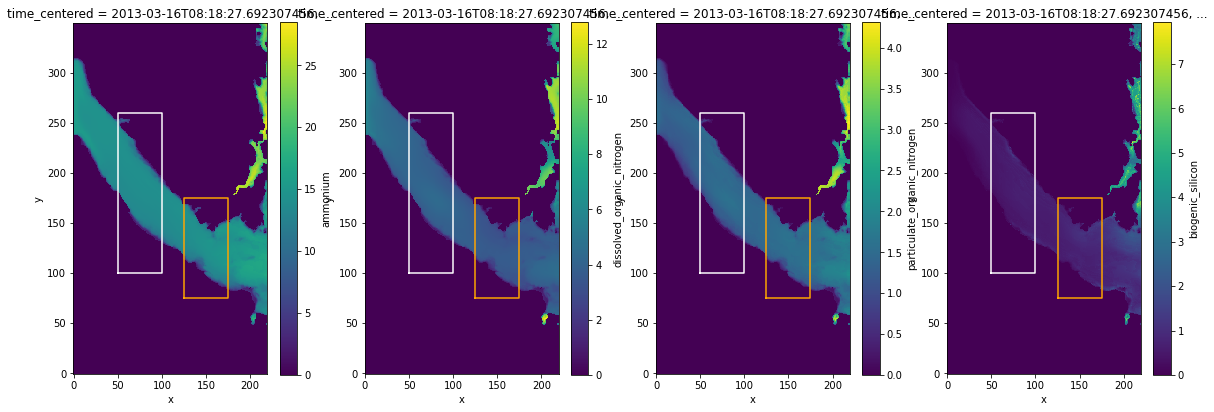

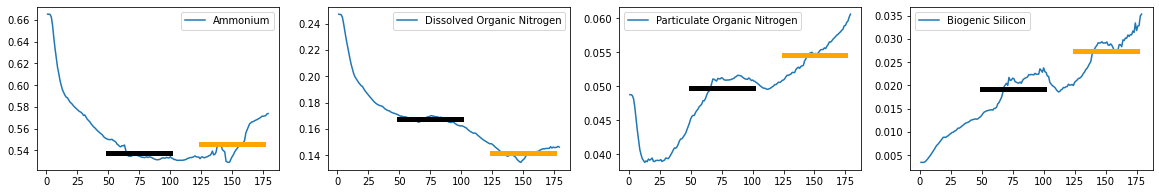

In [252]:
do_other_plots(data)
data.close()

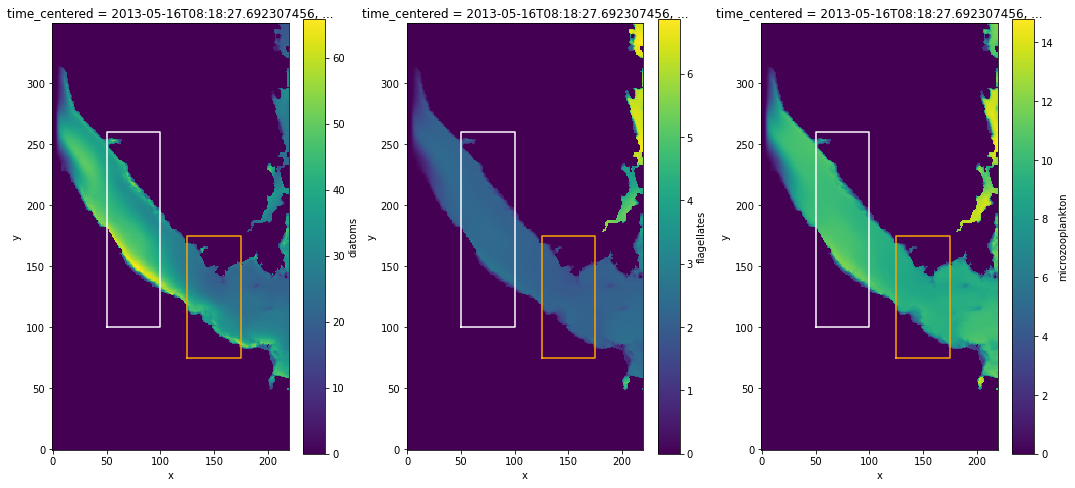

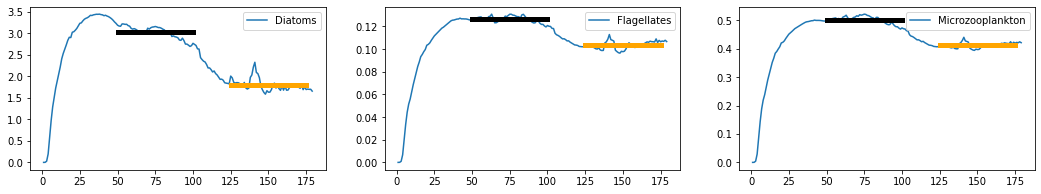

In [255]:
month = 'may'
data = xr.open_dataset(f'/data/sallen/results/MEOPAR/averages/SalishSea_{month}_climate_2007_2019_ptrc_T.nc')
do_plots(data)

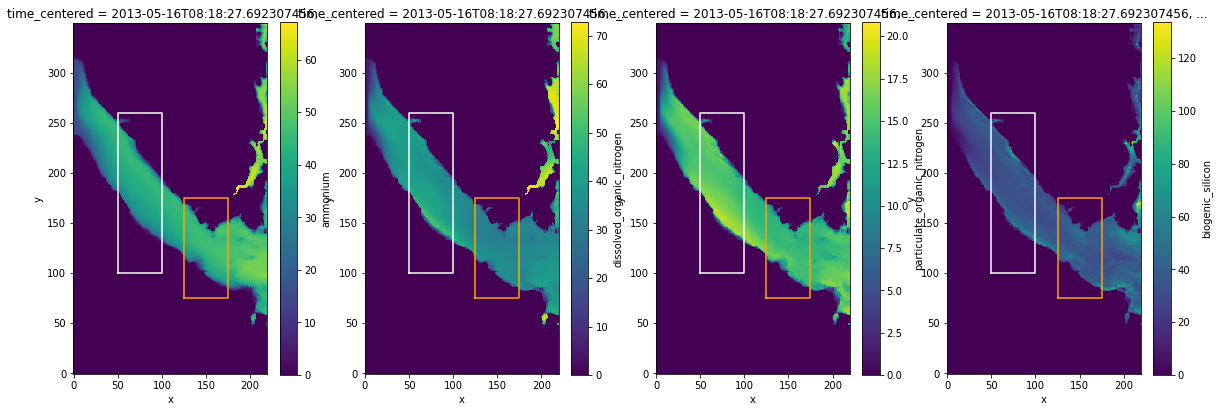

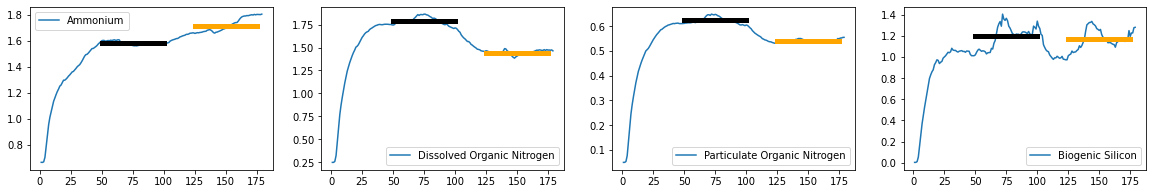

In [254]:
do_other_plots(data)
data.close()

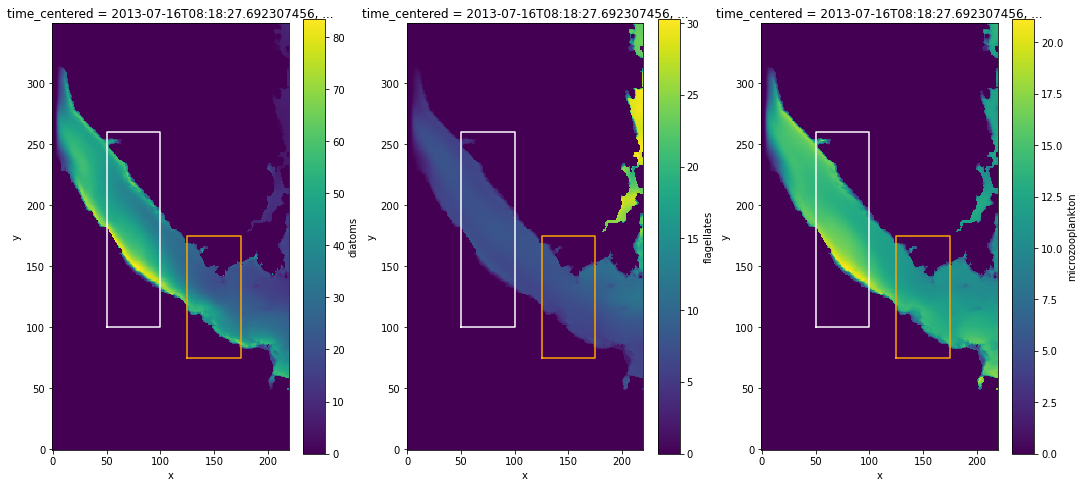

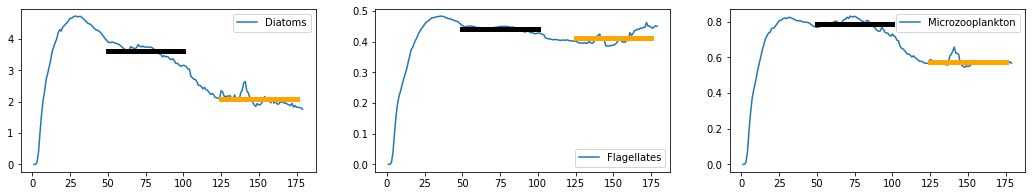

In [256]:
month = 'jul'
data = xr.open_dataset(f'/data/sallen/results/MEOPAR/averages/SalishSea_{month}_climate_2007_2019_ptrc_T.nc')
do_plots(data)

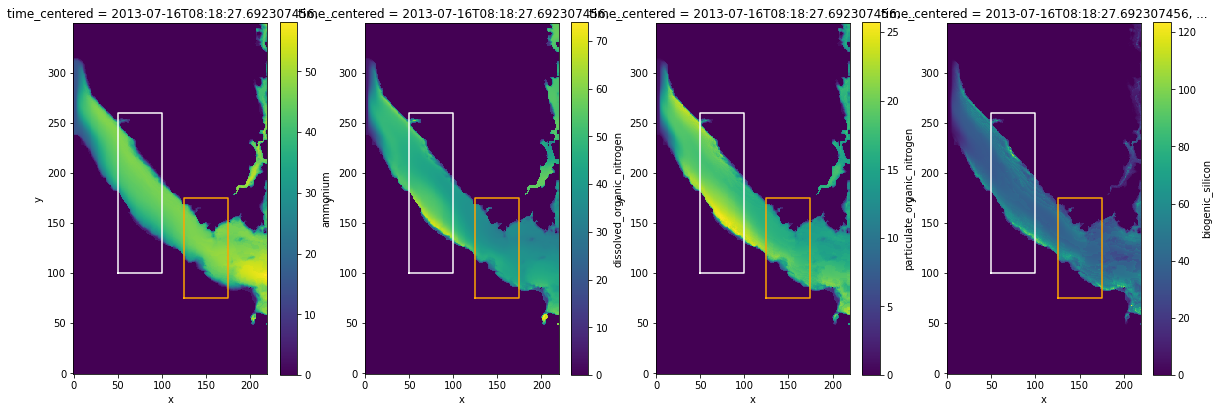

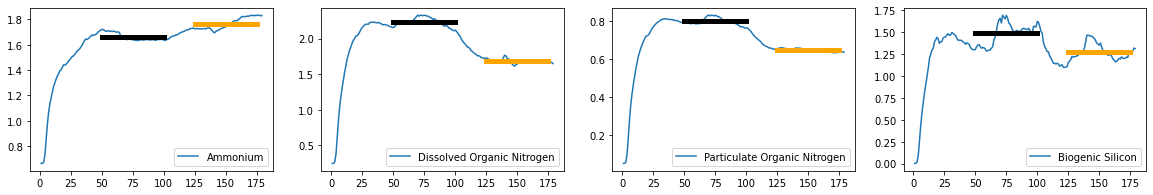

In [257]:
do_other_plots(data)
data.close()

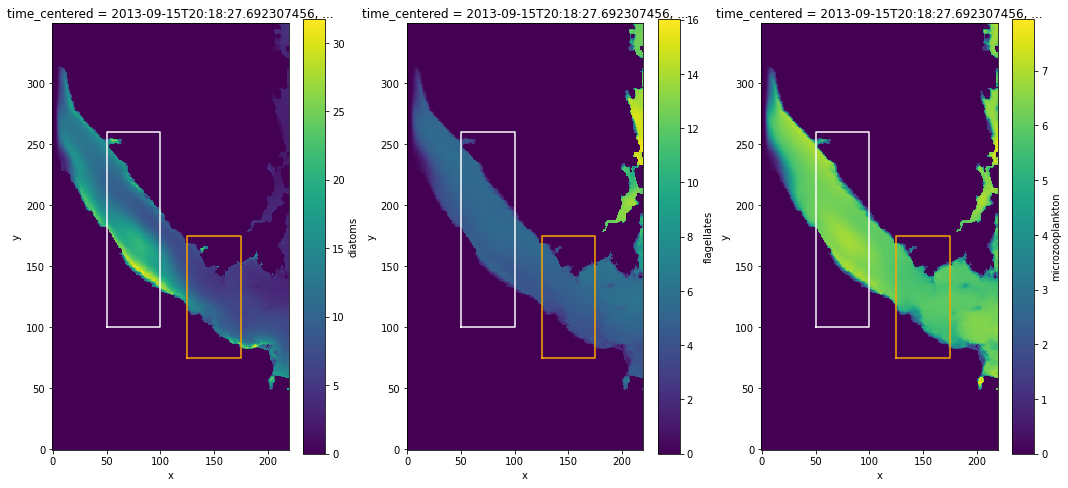

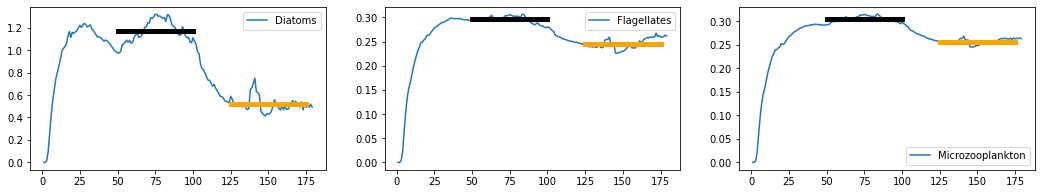

In [258]:
month = 'sep'
data = xr.open_dataset(f'/data/sallen/results/MEOPAR/averages/SalishSea_{month}_climate_2007_2019_ptrc_T.nc')
do_plots(data)

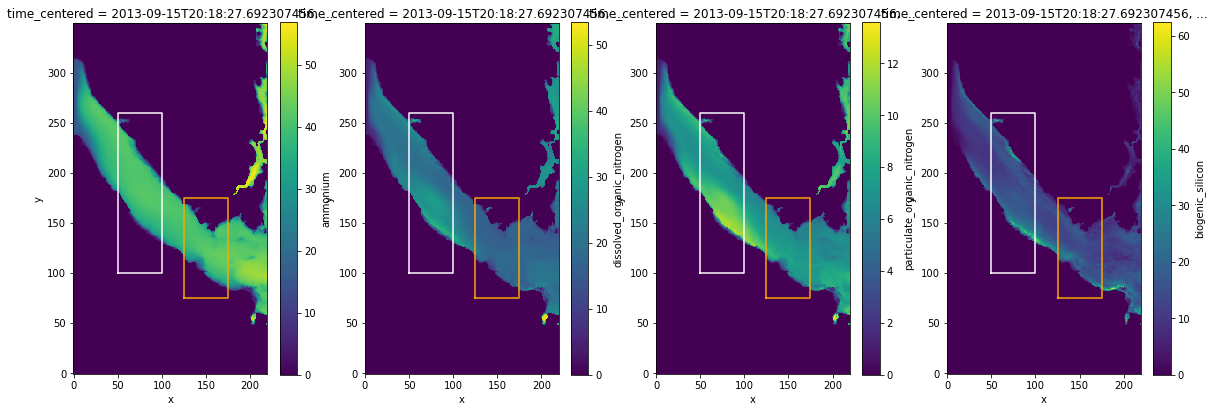

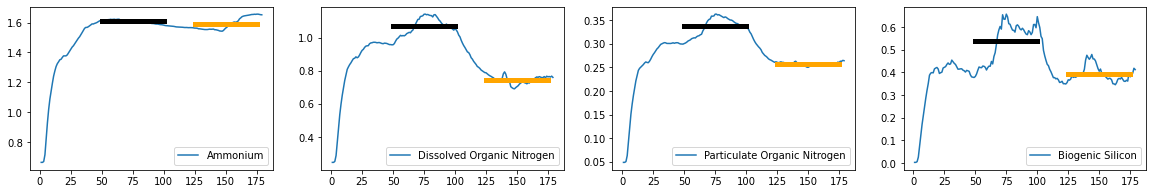

In [259]:
do_other_plots(data)
data.close()

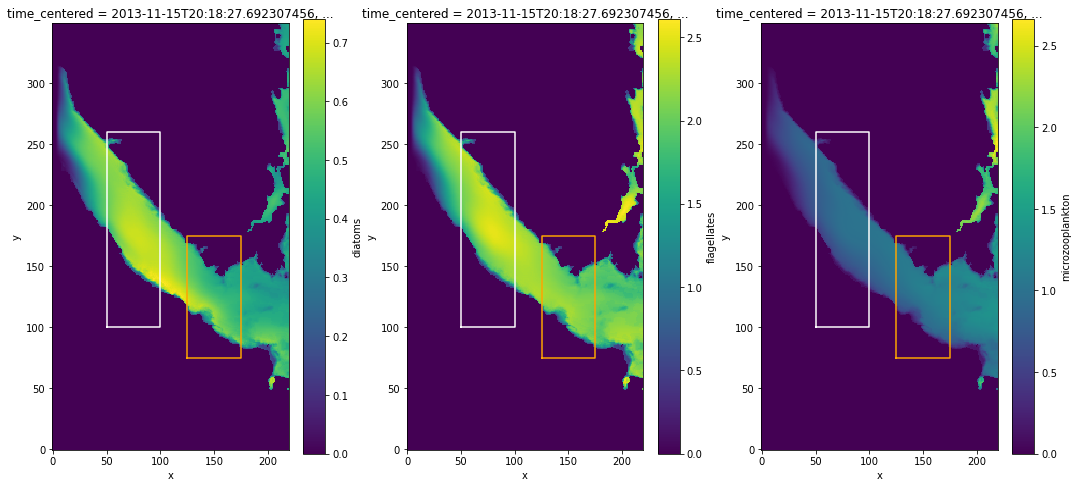

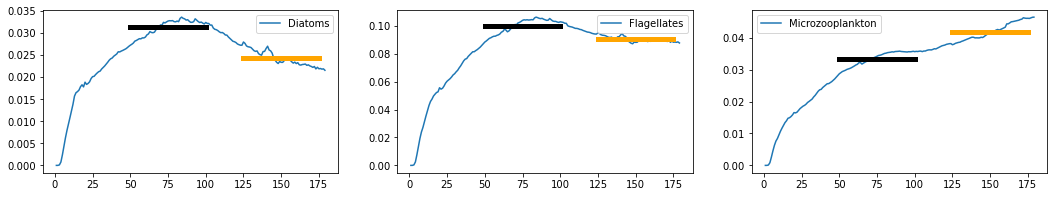

In [260]:
month = 'nov'
data = xr.open_dataset(f'/data/sallen/results/MEOPAR/averages/SalishSea_{month}_climate_2007_2019_ptrc_T.nc')
do_plots(data)

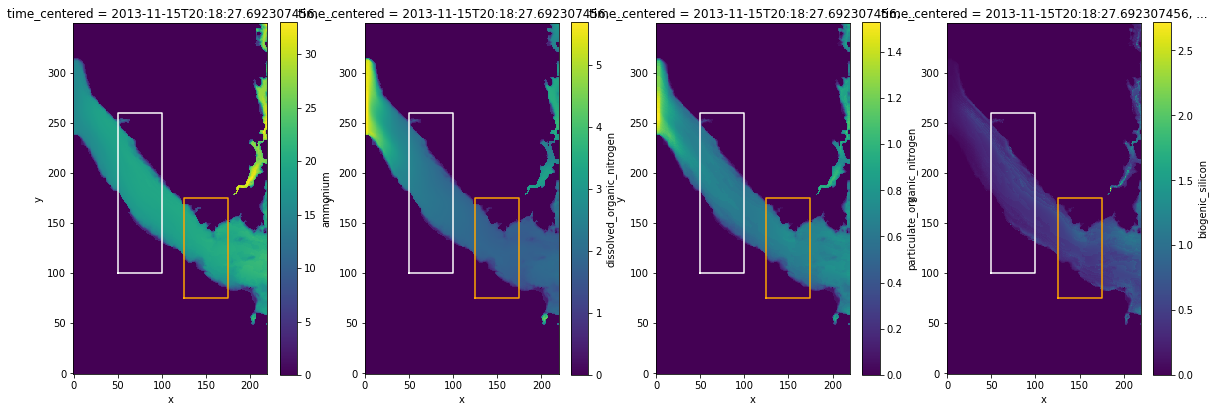

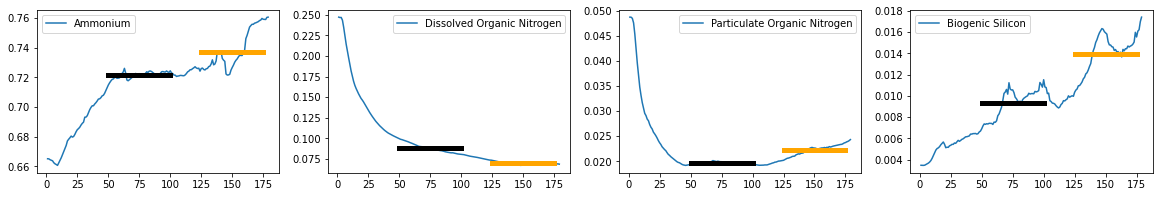

In [261]:
do_other_plots(data)
data.close()

## Use the East Box ##

In [420]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
jmin, jmax = 125, 175
imin, imax = 75 + 150, 175 + 150
fields = ['diatoms', 'flagellates', 'microzooplankton', 'ammonium', 'dissolved_organic_nitrogen', 
          'particulate_organic_nitrogen', 'biogenic_silicon']

In [421]:
da = {}
times = np.zeros(12)
for var in fields:
    da[var] = np.zeros((12, 40))
for im, month in enumerate(months):
    print (month)
    volume = np.ma.masked_array(np.array(meshx.e3t_0[0, :, imin:imax, jmin:jmax]), 
                                mask = tmask[:, imin:imax, jmin:jmax])
    for var in fields:
        print (var)
        data = xr.open_dataset(f'/data/sallen/results/MEOPAR/averages/SalishSea_{month}_climate_2007_2019_ptrc_T.nc')
        quantity = np.ma.masked_array(np.array(data[var][0, :, imin:imax, jmin:jmax]) 
                                 * np.array(meshx.e3t_0[0, :, imin:imax, jmin:jmax]), 
                                 mask = tmask[:, imin:imax, jmin:jmax])
        da[var][im] = (quantity/volume).mean(axis=1).mean(axis=1)
    times[im] = data.time_counter[:]

jan
diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon
feb
diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon
mar
diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon
apr
diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon
may
diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon
jun
diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon
jul
diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon
aug
diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon
sep
diatoms
flag

In [422]:
data.diatoms.attrs

{'standard_name': 'mole_concentration_of_diatoms_expressed_as_nitrogen_in_sea_water',
 'long_name': 'Diatoms Concentration',
 'units': 'mmol m-3',
 'online_operation': 'average',
 'interval_operation': '40 s',
 'interval_write': '1 h',
 'cell_methods': 'time: mean (interval: 40 s) time_counter: mean',
 'cell_measures': 'area: area'}

In [423]:
data.time_counter.attrs

{'axis': 'T',
 'standard_name': 'time',
 'long_name': 'Time axis',
 'time_origin': '1900-01-01 00:00:00',
 'bounds': 'time_counter_bounds',
 'cell_methods': 'time_counter: mean'}

In [424]:
data.deptht.attrs

{'name': 'deptht',
 'long_name': 'Vertical T levels',
 'units': 'm',
 'axis': 'Z',
 'positive': 'down',
 'bounds': 'deptht_bounds'}

In [425]:
ds_attrs = {
    'creator_email':
        'sallen@eoas.ubc.ca',
    'creator_name':
        'Salish Sea MEOPAR Project Contributors',
    'creator_url':
        'https://salishsea-meopar-docs.readthedocs.org/',
    'institution':
        'UBC EOAS',
    'institution_fullname': (
        'Earth, Ocean & Atmospheric Sciences,'
        ' University of British Columbia'
    ),
    'summary': (
        'Diatoms, flagellates, microzooplankton, ammonimum, ',
        'dissolved and particulate organic nitrogen, '
        'biogenic silicon ',
        'from SalishSeaCast v201905 eastern Juan de Fuca '
        ' implemented for western open boundary. '
    ),
    'source': (
        'https://github.com/SalishSeaCast/tools/blob/master/I_ForcingFiles/OBC/OBC_Plankton_fromClimate.ipynb'
    ),
    'history': (
        '[{}] File creation.'
        .format(datetime.datetime.today().strftime('%Y-%m-%d'))
    )
}

In [426]:
print (da['diatoms'].shape)

(12, 40)


In [427]:
width = 950
x = da['diatoms']
y = np.tile(x.transpose(), (width, 1, 1, 1))
y.transpose().shape

(12, 40, 1, 950)

In [428]:
{'standard_name': data['diatoms'].attrs['standard_name'],
    'long_name': data['diatoms'].attrs['long_name'],
 'units': data['diatoms'].attrs['units']}

{'standard_name': 'mole_concentration_of_diatoms_expressed_as_nitrogen_in_sea_water',
 'long_name': 'Diatoms Concentration',
 'units': 'mmol m-3'}

In [429]:
daa = {}
for var in fields:
    print (var)
    daa[var] = xr.DataArray(
        data=(np.tile(da[var].transpose(), (width, 1, 1, 1))).transpose(), 
        name=var,
        dims=('time_counter', 'deptht', 'yb', 'xbT'),
        coords={
            'time_counter': times,
            'deptht': data.deptht,
            'yb': [1],
            'xbT': np.arange(width)
        },
        attrs={'standard_name': data[var].attrs['standard_name'],
            'long_name': data[var].attrs['long_name'],
             'units': data[var].attrs['units']}
    )

diatoms
flagellates
microzooplankton
ammonium
dissolved_organic_nitrogen
particulate_organic_nitrogen
biogenic_silicon


In [430]:
times/365.25/24./3600./1e9

array([43.04206813, 43.12315063, 43.20423314, 43.28773759, 43.37124204,
       43.45474649, 43.53825093, 43.62312431, 43.70662876, 43.79013321,
       43.87363766, 43.9571421 ])

In [431]:
ds = xr.Dataset(
    data_vars=daa,
    coords={
        'time_counter': times,
        'deptht': data.deptht,
        'yb': [1],
        'xbT': np.arange(width)
    },
    attrs=ds_attrs
)

In [432]:
data.time_counter.attrs

{'axis': 'T',
 'standard_name': 'time',
 'long_name': 'Time axis',
 'time_origin': '1900-01-01 00:00:00',
 'bounds': 'time_counter_bounds',
 'cell_methods': 'time_counter: mean'}

In [457]:
ds.time_counter.attrs['axis'] = 'T'
ds.time_counter.attrs['standard_name'] = 'time'
ds.time_counter.attrs['time_origin'] = '1970-01-01 00:00:00'
ds.time_counter.attrs[ 'units'] = 'nanoseconds since 1970-01-01 00:00:00'
ds.time_counter.attrs[ 'cell_methods'] = 'time_counter: mean'

In [458]:
encoding = {var: {'zlib': True} for var in ds.data_vars}
ds.to_netcdf(
        path='OBC_Plankton_fromClimate_2007_2019_v201905.nc',
        unlimited_dims=('time_counter'),
        encoding=encoding,
    )

In [459]:
ds.close()

In [460]:
mytest = xr.open_dataset('OBC_Plankton_fromClimate_2007_2019_v201905.nc')
mytest.time_counter

<xarray.DataArray 'time_counter' (time_counter: 12)>
array(['2013-01-16T02:46:09.230769152', '2013-02-14T17:32:18.461538304',
       '2013-03-16T08:18:27.692307456', '2013-04-15T20:18:27.692307456',
       '2013-05-16T08:18:27.692307456', '2013-06-15T20:18:27.692307456',
       '2013-07-16T08:18:27.692307456', '2013-08-16T08:18:27.692307456',
       '2013-09-15T20:18:27.692307456', '2013-10-16T08:18:27.692307456',
       '2013-11-15T20:18:27.692307456', '2013-12-16T08:18:27.692307456'],
      dtype='datetime64[ns]')
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2013-01-16T02:46:09.230769152...
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1970-01-01 00:00:00
    cell_methods:   time_counter: mean

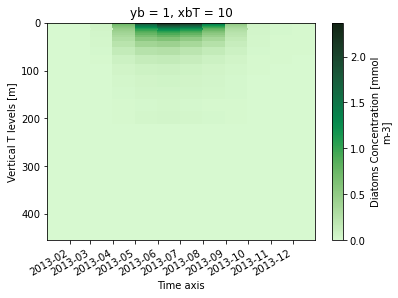

In [469]:
mytest.diatoms[:,:,0,10].transpose().plot(yincrease=False, cmap=cm.algae);

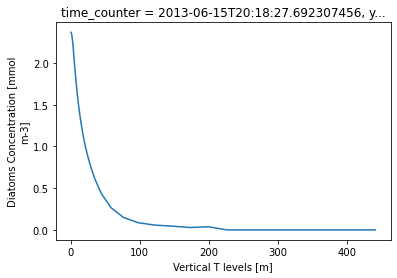

In [474]:
mytest.diatoms[5,:,0,10].plot();